In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from nltk import WhitespaceTokenizer
import urllib
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('it_news_real.csv', index_col=0,encoding='utf-8')
df.head(3)

,title,date,link,content
0,"[증시이슈] 연이은 빅딜에도 사흘 내리 하락한 CJ ENM, 왜?",2021.11.25,https://economist.co.kr/2021/11/25/it/general/...,분할 법인에 예능·드라마·영화·애니메이션 모두 넘기면… 미국 LA 스테이플스...
1,"[팩플] 다들 반대할 때 ""카카오페이 해보자""한 류영준, 카카오 이끈다",2021.11.25,https://www.joongang.co.kr/article/25026933,카카오의 공동대표로 내정된 류영준(왼쪽) 내정자와 여민수(오른쪽) 대표. 카카오 제...
2,"LG그룹 COO로 권봉석 부회장, LG전자 대표는 조주완 사장",1818.12.12,http://www.etnews.com/20211125000208,"권봉석 LG전자 대표이사가 부회장으로 승진, ㈜LG 최고운영책임자(COO)로 선임됐..."


In [3]:
df.describe()

,title,date,link,content
count,1000,1000,1000,1000
unique,985,6,993,990
top,"한국의 인공태양 KSTAR, 1억도 30초 운전 성공",2021.11.24,http://news.heraldcorp.com/view.php?ud=2021112...,KBS 대전]한국의 인공태양 케이스타(KSTAR)가 이온 온도 1억도 초고온 플라즈...
freq,4,215,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1000 non-null   object
 1   date     1000 non-null   object
 2   link     1000 non-null   object
 3   content  1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [5]:
df = df[df['date'].str.contains('2021')]
df

,title,date,link,content
0,"[증시이슈] 연이은 빅딜에도 사흘 내리 하락한 CJ ENM, 왜?",2021.11.25,https://economist.co.kr/2021/11/25/it/general/...,분할 법인에 예능·드라마·영화·애니메이션 모두 넘기면… 미국 LA 스테이플스...
1,"[팩플] 다들 반대할 때 ""카카오페이 해보자""한 류영준, 카카오 이끈다",2021.11.25,https://www.joongang.co.kr/article/25026933,카카오의 공동대표로 내정된 류영준(왼쪽) 내정자와 여민수(오른쪽) 대표. 카카오 제...
3,BM 전문가 여민수-개발자 출신 CEO 류영준 시너지,2021.11.25,http://www.fnnews.com/news/202111251603327311,카카오 내년 3월 여민수-류영준 공동대표 체제카카오커머스와 카카오페이 등 쇼핑+결제...
4,"롯데그룹, 이동우 부회장式 혁신에 힘 싣는다",2021.11.25,http://www.bloter.net/newsView/blt202111250036,이동우 롯데지주 대표이사 부회장.(사진=롯데.)롯데그룹은 2022년 정기 임원인사에...
5,"멤버십에 부는 '개인화' 바람…SKT·KT·LGU+, 기본 지키고 선택권 더했다",2021.11.25,http://www.bloter.net/newsView/blt202111250030,SK텔레콤·KT·LG유플러스 등 이동통신 3사가 고착화된 멤버십 구조에 개인화 요소...
...,...,...,...,...
995,오징어게임 대박…넷플릭스 한국 월이용자 1000만 육박,2021.11.21,https://view.asiae.co.kr/article/2021112114074...,'오징어게임'으로 흥행에 성공한 글로벌 온라인동영상서비스(OTT) 넷플릭스의 한국 ...
996,"5대 외국계 IT기업 소비자 불만 상담, 10건 중 7건이 애플",2021.11.21,https://www.khan.co.kr/it/it-general/article/2...,경향신문] 애플스토어에 설치된 애플 로고. 로이터연합뉴스최근 5년간 주요 외국계 정...
997,[일잘러의 협업툴]②잔디·슬랙…MBTI처럼 '우리 회사'에 딱 맞는 툴은?,2021.11.21,http://www.bloter.net/newsView/blt202111190066,"코로나19 이전에는 마이크로소프트(MS)의 워드, 엑셀, 파워포인트만 잘 해도 일잘..."
998,세금 내는 법 더 편해질까…‘국세 간편결제’ 법안 나왔다,2021.11.21,https://economist.co.kr/2021/11/21/it/general/...,"윤관석 의원, 19일 국세징수법 개정안 대표 발의지방세 납부 때만 가능했던 간편결제..."


In [6]:
df['date'].value_counts()

2021.11.24    215
2021.11.23    212
2021.11.22    200
2021.11.25    169
2021.11.21     30
Name: date, dtype: int64

In [7]:
df.head(2)

,title,date,link,content
0,"[증시이슈] 연이은 빅딜에도 사흘 내리 하락한 CJ ENM, 왜?",2021.11.25,https://economist.co.kr/2021/11/25/it/general/...,분할 법인에 예능·드라마·영화·애니메이션 모두 넘기면… 미국 LA 스테이플스...
1,"[팩플] 다들 반대할 때 ""카카오페이 해보자""한 류영준, 카카오 이끈다",2021.11.25,https://www.joongang.co.kr/article/25026933,카카오의 공동대표로 내정된 류영준(왼쪽) 내정자와 여민수(오른쪽) 대표. 카카오 제...


In [8]:
tokenizer = WhitespaceTokenizer()
tokens1 = tokenizer.tokenize(' '.join(df['title']))

In [9]:
title1 = Counter(tokens1)
title1.most_common(10)

[('美', 30),
 ('넷플릭스', 25),
 ('5G', 22),
 ('첫', 22),
 ('메타버스', 22),
 ('세계', 21),
 ('개발', 20),
 ('더', 19),
 ('반도체', 18),
 ('기술', 17)]

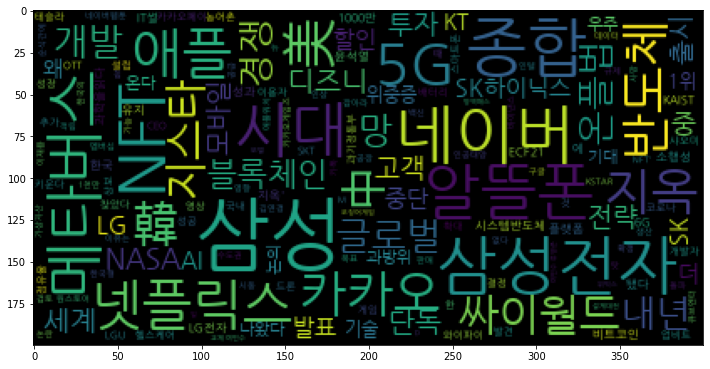

In [10]:
wc = WordCloud(font_path=r'\Users\user\Downloads\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf')
result = wc.generate(' '.join(title1))

plt.figure(figsize=(12,12))
plt.imshow(result)
plt.show()

In [11]:
tokens2 = tokenizer.tokenize(' '.join(df['content']))
content1 = Counter(tokens2)
content1.most_common(20)

[('수', 2409),
 ('있다.', 1541),
 ('등', 1385),
 ('있는', 1275),
 ('것으로', 1020),
 ('통해', 931),
 ('지난', 834),
 ('이', 719),
 ('및', 649),
 ('위해', 641),
 ('대한', 622),
 ('위한', 583),
 ('국내', 565),
 ('글로벌', 550),
 ('5G', 519),
 ('미국', 459),
 ('더', 447),
 ('한', 443),
 ('따르면', 415),
 ('반도체', 407)]

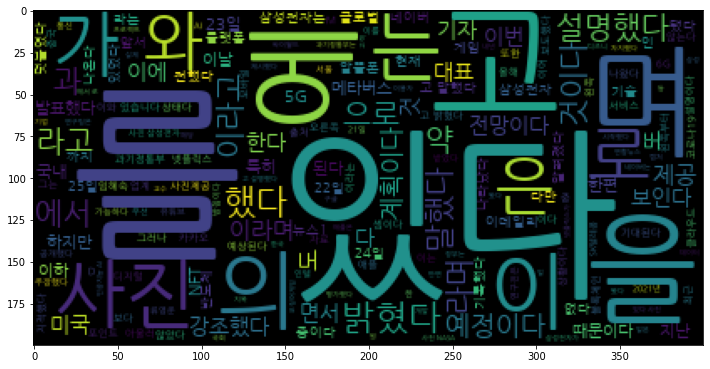

In [12]:
wc = WordCloud(font_path=r'\Users\user\Downloads\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf')
result = wc.generate(' '.join(content1))

plt.figure(figsize=(12,12))
plt.imshow(result)
plt.show()

In [54]:
tokens3 = tokenizer.tokenize(' '.join(df['content']))
content2 = Counter(tokens3)
content2.most_common(20)

[('등', 1384),
 ('.', 1242),
 ('것으로', 897),
 ('지난', 820),
 ('이', 717),
 ('있는', 683),
 ('및', 649),
 ('대한', 622),
 ('국내', 540),
 ('글로벌', 534),
 ('5G', 517),
 ('미국', 450),
 ('따르면', 415),
 ('한', 407),
 ('더', 398),
 ('반도체', 397),
 ('다양한', 390),
 ('올해', 380),
 ('최근', 371),
 ('알뜰폰', 370)]

In [146]:
df['content'] = df['content'].str.replace('등 ','')

In [147]:
tokens3 = tokenizer.tokenize(' '.join(df['content']))
content2 = Counter(tokens3)
content2.most_common(20)

[('등', 5),
 ('수', 4),
 ('디지털데일이상일기자]', 4),
 ('내년', 3),
 ('위해', 3),
 ('및', 3),
 ('위치추정확도떨어지필부가서비스부족부분개선해합니다정알뜰사업자들대여료낮가경쟁력높이한편', 3),
 ('이통사점유제한', 3),
 ('검토방침입니다KB뉴김민아입니다촬영기자:문아미/그래픽:채상', 3),
 ('있는', 3),
 ('e-SIM', 3),
 ('NFT', 3),
 ('블록체인', 3),
 ('기반', 2),
 ('코로나19', 2),
 ('분자진단', 2),
 ('있도록', 2),
 ('첫', 2),
 ('작품', 2),
 ('본격', 2)]

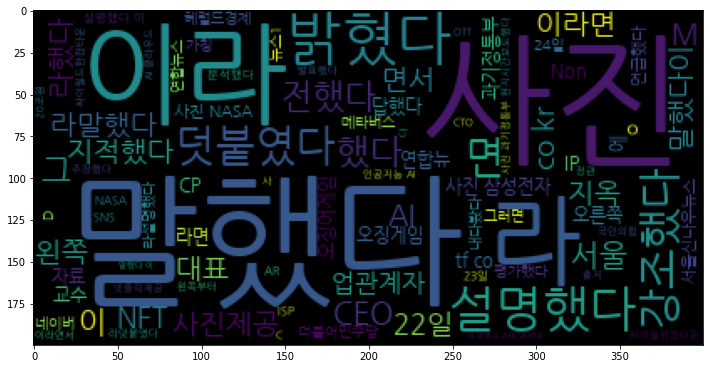

In [148]:
wc = WordCloud(font_path=r'\Users\user\Downloads\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf')
result = wc.generate(' '.join(content2))

plt.figure(figsize=(12,12))
plt.imshow(result)
plt.show()

In [13]:
df.to_csv('it_news.csv')